In [1]:
import numpy as np
from brute_force import compute_voronoi_diagram
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

# Demonstration

<IPython.core.display.Javascript object>


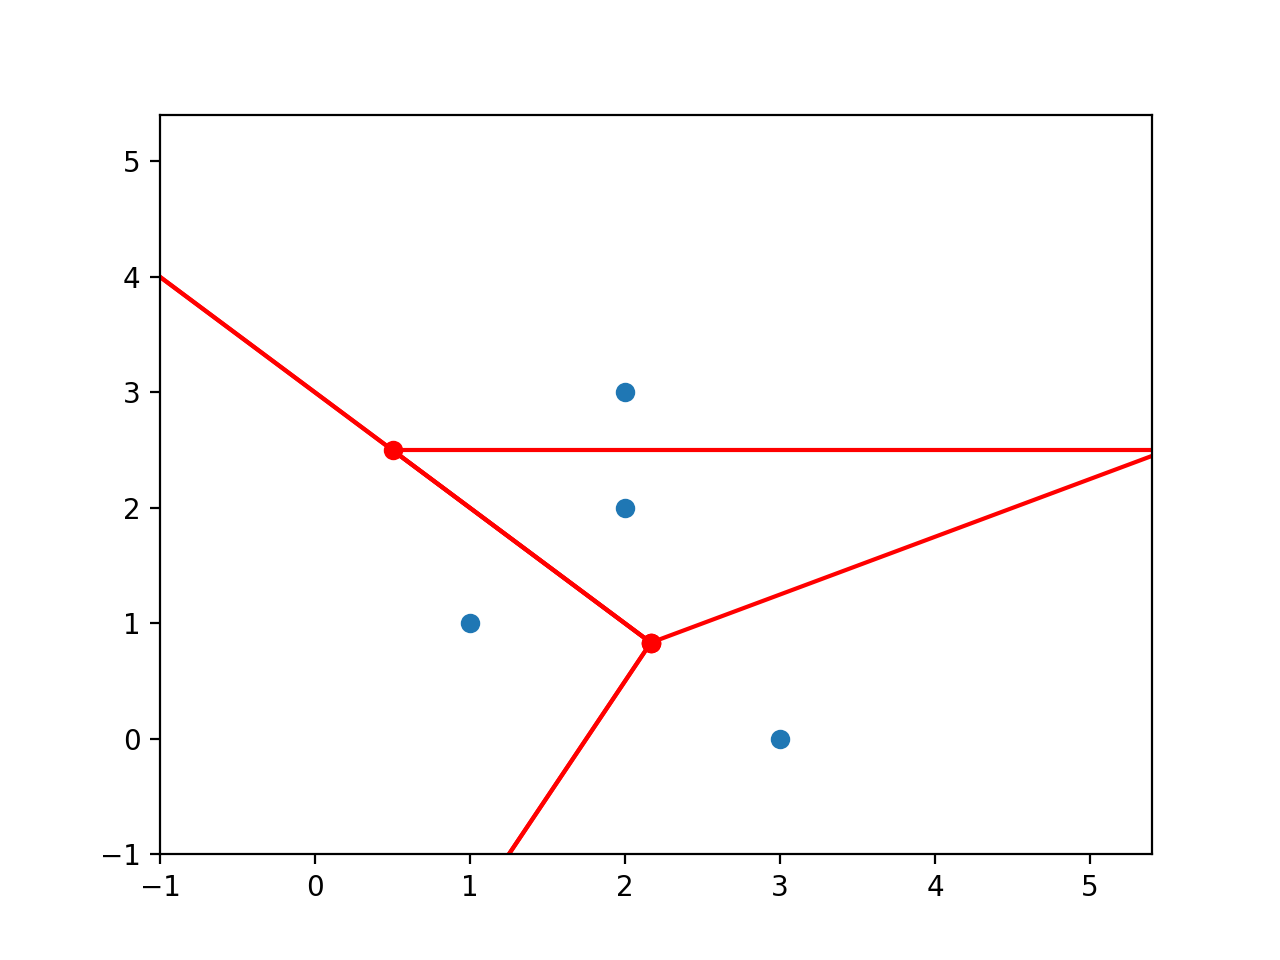

In [11]:
plt.close()

points = np.array([[2., 2.], [1., 1.], [2., 3.], [3., 0.]])

plt.scatter(*zip(*points))

plt.xlim((-1, 5.4))
plt.ylim((-1, 5.4))

faces, voronoi_vertices = compute_voronoi_diagram(points, -2, -2, 10.5, 10.5)

for i, face in enumerate(faces):
    for v in face.vertex:
        #print('main: ', v.point)
        plt.scatter(*v.point, color='red')
        if v.next is not None:
            plt.plot(*zip(*[v.point, v.next.point]), color='red')

plt.show()

# Runtime analisis 

In [12]:
def run(n, a, b):
    points = np.array([np.random.uniform(a, b, size=(2,)) for _ in range(n)])

    import time
    start = time.time()
    faces, voronoi_vertices = compute_voronoi_diagram(points, (a-1)*2, (a-1)*2, (b + 1)*2, (b + 1)*2)
    end = time.time()

    return end - start

<IPython.core.display.Javascript object>


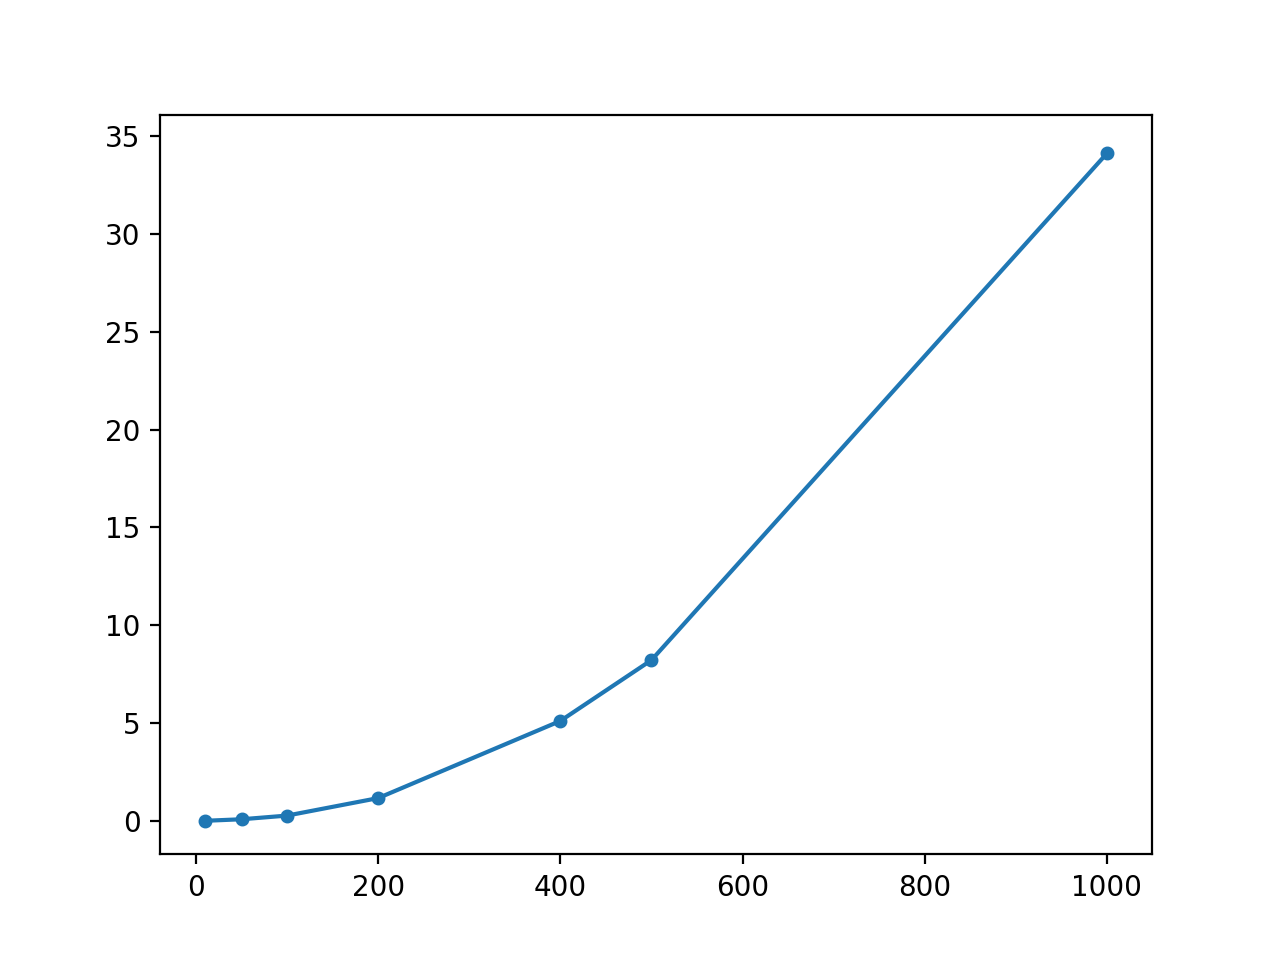

In [15]:
plt.close()
ns = [10, 50, 100, 200, 400, 500, 1000]

times = [[],[]]

for i in ns:
    time1 = run(i, 0, 30)
    time2 = run(i, 0, 30)
    time3 = run(i, 0, 30)
    
    time = np.mean([time1, time2, time3])
    std = np.std([time1, time2, time3])
    
    times[0].append(time)
    times[1].append(std)

plt.errorbar(ns, times[0], yerr=times[1], marker='o', ms=4, ecolor='red')
plt.show()